In [1]:
import keras
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import pandas as pd
import os

list_classes = []

#listing all the image classes available , which are the names of the different folders containing images 

for root , dirs , files in os.walk(r'E:\Code\AnimalClassifierCNN\AnimalClassifier\images'):
    
    for folder in dirs:
        
        list_classes.append(folder)
        
print(list_classes)

#creating a dict assigning an individual number to each class 
class_dict = dict()

for i in range(len(list_classes)):
    
    class_dict[list_classes[i]] = i 


Using TensorFlow backend.


['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [2]:
import os
import glob
import cv2


#loading all the images in all the folders

def load_data(img_path , classes):
    
    x = []
    y = []
    
    for img_type in classes:
        
        path = os.path.join(img_path , img_type)
        
        for i in os.listdir(path):
            
            file_path = os.path.join(path , i)
            img = image.imread(file_path)
            img_resized = cv2.resize(img , (100,100))
            img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
            x.append(img_resized)
            y.append(class_dict[img_type])
            
    return x , y 



X , Y = load_data('images' , list_classes)


#print(X[0])

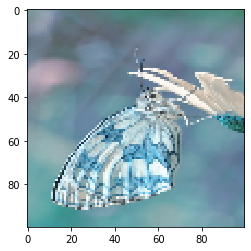

In [3]:
x_copy = X.copy()
y_copy = Y.copy()

plt.imshow(x_copy[0])
plt.show()

In [4]:
#function to get the name of the class 

from keras.utils import to_categorical

def get_class_name(class_num):
    
    for c in class_dict.keys():
        
        if class_dict[c] == class_num:
            
            return c

x = np.array(x_copy)
x = (x * 255).astype(np.uint8)
y = np.array(y_copy)

y = to_categorical(y)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


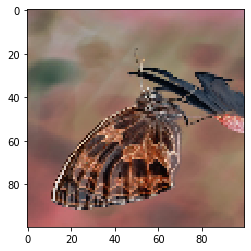

In [5]:
plt.imshow(x[0])
print(y[0])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


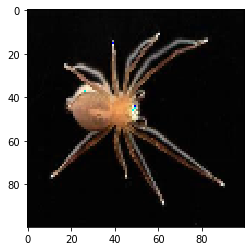

In [6]:
#test and train data split

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.33)

plt.imshow(x_train[0])
print(y_train[0])

In [7]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

#datagen.fit(x_train)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D , Dense , Flatten , Dropout , MaxPooling2D , BatchNormalization , Activation

batch_size = 32

model = Sequential()
model.add(Conv2D(100, kernel_size = 10 ,strides = [2,2] , input_shape = ( 100 , 100 , 3) ,activation='relu'))
#model.add(MaxPooling2D(pool_size = [2,2]))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(100 , kernel_size = 5  , strides = [2,2] , activation='relu'))
#model.add(MaxPooling2D(pool_size = [2,2]))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(50 , kernel_size = 5  , strides = [2,2] , activation='relu'))
#model.add(MaxPooling2D(pool_size = [2,2]))
model.add(Dropout(0.3))
model.add(Conv2D(50 , kernel_size = 3 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv2D(256 , kernel_size = 3 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(256 ))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3)) 
model.add(Dense(128))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3)) 
model.add(Dense(64))
#model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.3)) 
model.add(Dense(32))
#model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.3)) 
model.add(Dense(10 , activation = 'softmax'))

W0414 21:29:24.493852  1684 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0414 21:29:24.765235  1684 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0414 21:29:24.837967  1684 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0414 21:29:24.925071  1684 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0414 21:29:24.931081  168

In [24]:
from keras import optimizers
from datetime import datetime

optimizer = optimizers.SGD(lr = 0.1)

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model.compile(optimizer=optimizer , loss = 'categorical_crossentropy',
             metrics=['accuracy'])
train_history = model.fit(x_train , y_train , validation_data = (x_test , y_test),
epochs = 10 ,batch_size = batch_size , callbacks = [tensorboard_callback])

Train on 17539 samples, validate on 8640 samples


W0414 22:00:35.604564  1684 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0414 22:00:35.605564  1684 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/10
17539/17539 [==============================] - 38s 2ms/step - loss: 1.8410 - acc: 0.3649 - val_loss: 2.1339 - val_acc: 0.2848
Epoch 2/10
17539/17539 [==============================] - 37s 2ms/step - loss: 1.8177 - acc: 0.3769 - val_loss: 2.5258 - val_acc: 0.2743
Epoch 3/10
17539/17539 [==============================] - 37s 2ms/step - loss: 1.8201 - acc: 0.3739 - val_loss: 1.9929 - val_acc: 0.3306
Epoch 4/10
17539/17539 [==============================] - 37s 2ms/step - loss: 1.7993 - acc: 0.3853 - val_loss: 2.3340 - val_acc: 0.2561
Epoch 5/10
17539/17539 [==============================] - 37s 2ms/step - loss: 1.7758 - acc: 0.3947 - val_loss: 2.9444 - val_acc: 0.1201
Epoch 6/10
17539/17539 [==============================] - 37s 2ms/step - loss: 1.7932 - acc: 0.3889 - val_loss: 2.1188 - val_acc: 0.2741
Epoch 7/10
17539/17539 [==============================] - 37s 2ms/step - loss: 1.7581 - acc: 0.4014 - val_loss: 1.8165 - val_acc: 0.3762
Epoch 8/10
17539/17539 [=================

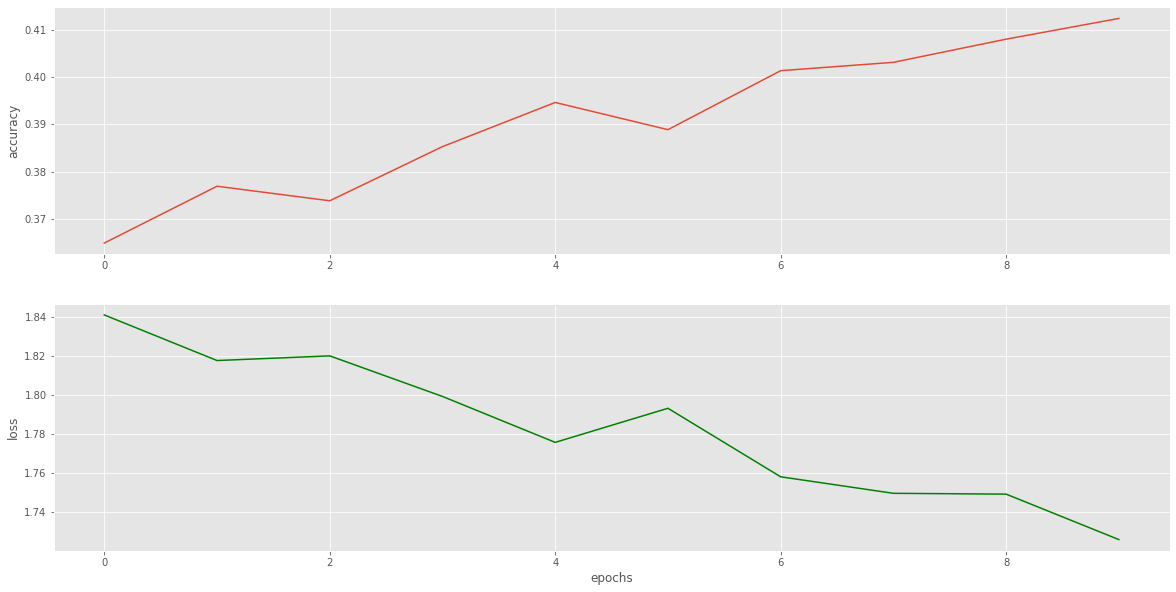

In [25]:
plt.style.use('ggplot')

fig , ax = plt.subplots(2,figsize=(20,10))

ax[0].plot(train_history.history['acc'])
ax[0].set_ylabel('accuracy')
ax[1].plot(train_history.history['loss'],'g')
ax[1].set_ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [20]:
from keras.utils import plot_model

os.environ["PATH"] += os.pathsep + 'F:/Software/graphviz/bin/'

plot_model(model , to_file = 'model_diagram.jpeg' , show_shapes = True)

In [26]:


def get_prediction(image_to_predict , model):
    
    prediction = model.predict(image_to_predict)[0]
    
    max_prob = 0
    max_index = 0
    
    for i in range(len(prediction)):
        
        if prediction[i] > max_prob:
            
            max_prob = prediction[i]
            max_index = i
            
    
    print("prediction is: {}".format(get_class_name(max_index)))
            
            
        

[[0.01245468 0.0216685  0.13347736 0.14122905 0.1992128  0.09248848
  0.09380404 0.1876501  0.04437855 0.07363648]] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


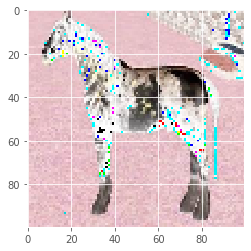

prediction is: dog


In [31]:

test_sample= x_test[14]
test_sample = np.array([test_sample])

prediction = model.predict(test_sample)

print(prediction,y_test[14])
plt.imshow(x_test[14])
plt.show()

get_prediction(test_sample, model)



prediction is: chicken


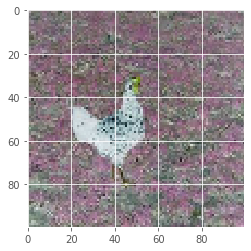

In [34]:
get_prediction(np.array([x_test[100]]) , model)

plt.imshow(x_test[100])